# Homework 1
# Data Processing: Convert the data to COCO format

### Check if torchvision is installed

In [4]:
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision not available.")

torch version: 2.0.1
torchvision version: 0.15.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.") #pip install -q torchinfo

In [6]:
import os
from pathlib import Path
print("Current folder:", os.getcwd())

Current folder: /home/015957045/DeepDataMiningLearning/DeepDataMiningLearning


## Explore Data folder structure for Argoverse-1.1

In [2]:
import os
from pathlib import Path
import pandas as pd

In [3]:
!ls /data/cmpe249-fa23/Argoverse/Argoverse-1.1/

Argoverse-Terms_of_Use.txt  images  labels


In [4]:
!ls /data/cmpe249-fa23/Argoverse/Argoverse-1.1/images

test  train  val


In [5]:
!ls /data/cmpe249-fa23/Argoverse/Argoverse-1.1/labels

train  val


In [7]:
# Check name of folders in train 
image_data_path =  '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/train'
label_data_path = '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/labels/train'

folders_imagedata = []
folders_labeldata = []

for path in Path(image_data_path).iterdir():
    if path.is_dir():
        str_path = str(path)
        temp = str(path).split('/')
        folders_imagedata.append(temp[-1])

for path in Path(label_data_path).iterdir():
    if path.is_dir():
        str_path = str(path)
        temp = str(path).split('/')
        folders_labeldata.append(temp[-1])
        
print(len(folders_imagedata))
print(len(folders_labeldata))

65
65


As you can see, the number of folders in train directory are the same for image and label. 

In [7]:
# Investigate the total number of images and labels
tot_img = 0
tot_lab = 0
for fold1, fold2 in zip(folders_imagedata, folders_labeldata):
    temp_path1 = image_data_path + '/' +  fold1 + '/ring_front_center'
    temp_path2 = image_data_path + '/' +  fold2 + '/ring_front_center'
    tot_img += len(os.listdir(temp_path1))
    tot_lab += len(os.listdir(temp_path2))
print(tot_img)
print(tot_lab)


39384
39384


In [8]:
image_path_list_val = list(Path('/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/val').glob("*/*/*.jpg"))
print('The total number of images in validation set: {}'.format(len(image_path_list_val)))

The total number of images in validation set: 15062


In [9]:
image_path_list_test = list(Path('/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/test').glob("*/*/*.jpg"))
print('The total number of images in test set: {}'.format(len(image_path_list_test)))

The total number of images in test set: 12507


## Load one sample image and label

In [11]:
from PIL import Image
import random
class_dic = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'bus', 5: 'truck', 6: 'traffic_light', 7: 'stop_sign'}
def read_image(seed_num):
    random.seed(seed_num)
    
    # 1. Get all image paths (* means "any combination")
    image_path_list = list(Path(image_data_path).glob("*/*/*.jpg"))
    # label_path_list = list(Path(label_data_path).glob("*/*/*.txt"))
    # print('The total number of images: {}'.format(len(image_path_list)))
    # print('The total number of labels: {}'.format(len(label_path_list)))
    
    # 2. Get a random image path
    random_image_path = random.choice(image_path_list)
    list_random_label_path = str(random_image_path).split('/')
    list_random_label_path[5] = 'labels'
    rename = list_random_label_path[-1].split('.')
    rename[-1] = 'txt'
    list_random_label_path[-1] = '.'.join(rename)
    random_label_path = Path('/'.join(list_random_label_path))
    
    # 3. Get image class from path name (the image class is the name of the directory where the image is stored)
    label_file = open(str(random_label_path), 'r')
    print(label_file.read())
    
    # 4. Open image
    img = Image.open(random_image_path)
    
    # 4. Print metadata
    print(f"Random image path: {random_image_path}")
    print(f"Image height: {img.height}") 
    print(f"Image width: {img.width}")
    display(img)
    
    

4 0.8929315476190476 0.48309523809523813 0.21413690476190486 0.43261904761904757
2 0.6092013888888889 0.5647222222222222 0.25173611111111105 0.16444444444444448
5 0.12161458333333333 0.56375 0.1828125 0.15083333333333335
6 0.13807291666666668 0.23583333333333334 0.01822916666666668 0.08333333333333333
6 0.2943181818181818 0.24117424242424246 0.016666666666666666 0.07856060606060607
6 0.42265625 0.42083333333333334 0.009895833333333333 0.028333333333333332
6 0.4503348214285714 0.41684523809523816 0.018229166666666668 0.02583333333333338
6 0.6090625000000001 0.06008333333333334 0.03270833333333331 0.12016666666666669
2 0.31276041666666665 0.51875 0.0171875 0.019166666666666665
2 0.2752864583333333 0.5165416666666666 0.01661458333333338 0.015083333333333258
2 0.7407552083333333 0.53 0.048177083333333336 0.0475
2 0.7671701388888892 0.5202777777777777 0.033715277777777906 0.04544444444444442
0 0.7864583333333334 0.5366666666666666 0.013541666666666667 0.09333333333333334

Random image path:

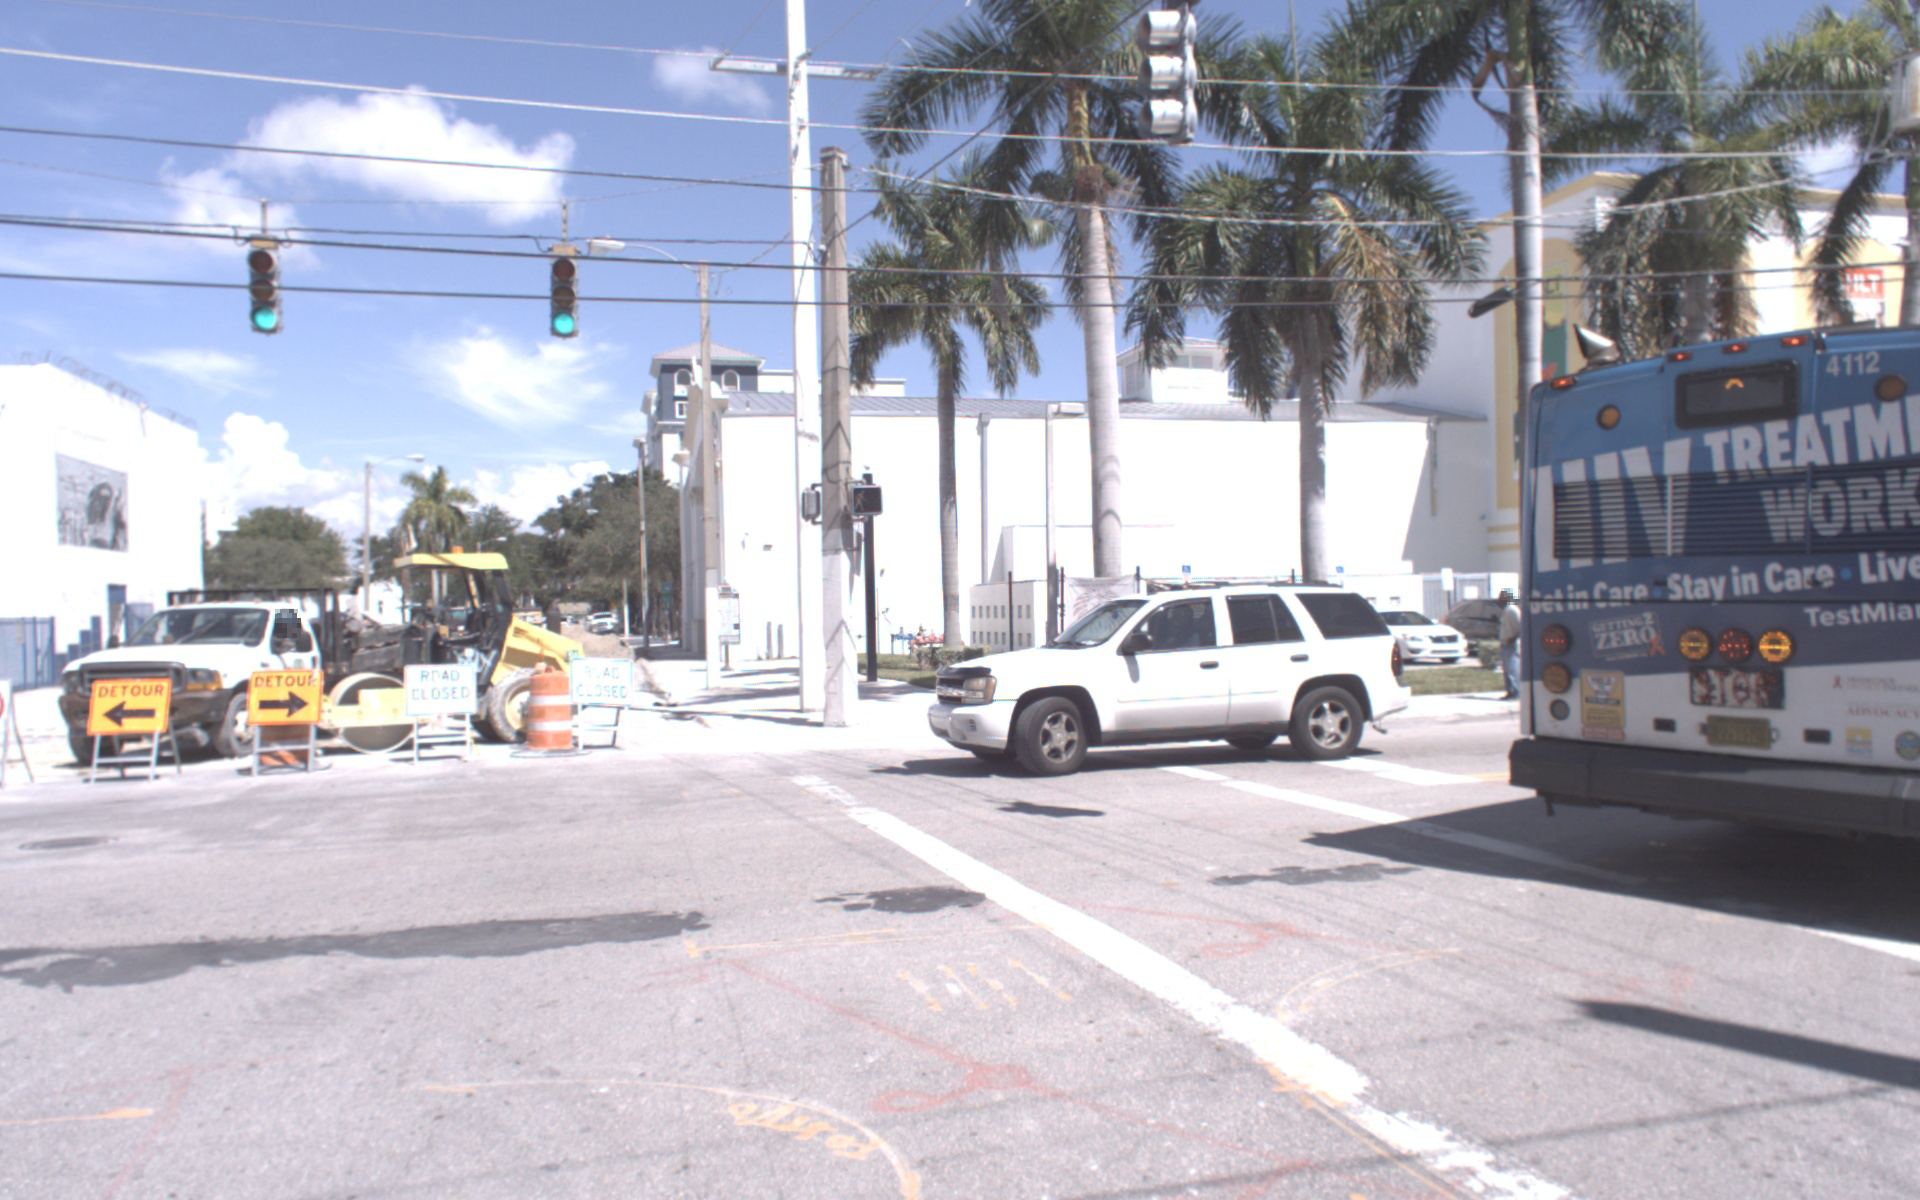

In [140]:
read_image(123)

## Plot bounding boxes

In [141]:
ex = image_data_path + '/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969043929037240.jpg'
l_ex = label_data_path + '/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969043929037240.txt'
l_ex

'/data/cmpe249-fa23/Argoverse/Argoverse-1.1/labels/train/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969043929037240.txt'

In [142]:
ex

'/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/train/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969043929037240.jpg'

In [143]:
def yolo_to_coco(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    return [x1, y1, w, h] 
bboxes = []
ids = []
l_path = l_ex
Imagewidth = 1920.0
ImageHeight = 1200.0
with open(str(l_path)) as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        temp_line_list = line.split(' ')

        # bbox annotation is x_center, y_center, width, height 
        obj_class, x_center, y_center, width_yolo, height_yolo = temp_line_list
        bbox = yolo_to_coco(float(x_center), float(y_center), float(width_yolo), float(height_yolo), Imagewidth, ImageHeight)

        bboxes.append(bbox)
        ids.append(int(obj_class))
        #print(f"bbox: {bbox}")

In [144]:
import cv2
imgdata = Image.open(ex)
img_array = np.array(imgdata)

im = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

In [145]:
from matplotlib.patches import Rectangle
def compute_color_for_labels(label):
    """
    Simple function that adds fixed color depending on the class
    """
    palette = (2 ** 11 - 1, 2 ** 15 - 1, 2 ** 20 - 1)
    #color = [int((p * (label ** 2 - label + 1)) % 255) for p in palette]
    color = [int((p * ((label+5*label) ** 2 - label + 1)) % 255) for p in palette]
    return tuple(color)
    
def show_image_bbxyxy(image, pred_bbox, pred_ids, title, savefigname=None):
    """Show a camera image and the given camera labels."""
        
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    boxnum=len(pred_bbox)
    pred_bbox = [[(i[0], i[1]), (i[2], i[3])] for i in pred_bbox]
    #print(boxnum)
    if len(pred_ids)<1:
        print("No object detected")
        return image
    else:
        
        #print(pred_labels)
        for i in range(boxnum):#patch in pred_bbox:
            patch=pred_bbox[i]
            #print(patch)
            colorlabel=compute_color_for_labels(pred_ids[i]) #INSTANCE_Color[label]
            #print(colorlabel)#RGB value 0-255
            colorlabelnormalized = [float(i)/255 for i in colorlabel] #0-1
            #label=pred_labels[i]
            #print(label)
            ax.add_patch(Rectangle(
            xy=patch[0],#(patch[0], patch[1]), #xmin ymin
            width=patch[1][0]-patch[0][0],#patch[2] - patch[0],
            height=patch[1][1]-patch[0][1],#patch[3] - patch[1],
            linewidth=4,
            edgecolor=colorlabelnormalized,#"red",
            facecolor='none'))
            #ax.text(patch[0][0], patch[0][1], label, color=colorlabelnormalized, fontsize=12)
            #ax.text(patch[0][0], patch[0][1], label, bbox=dict(facecolor='red', alpha=0.5))#fontsize=8)
        
    ax.imshow(image)
    
    ax.title.set_text(title)
    ax.grid(False)
    ax.axis('off')
    
    if savefigname is not None:
        fig.savefig(savefigname)

In [146]:
boxes_xyxy = [[box[0], box[1], box[0]+box[2], box[1]+box[3]] for box in bboxes] #xywh->xyxy
#boxes_xyxy

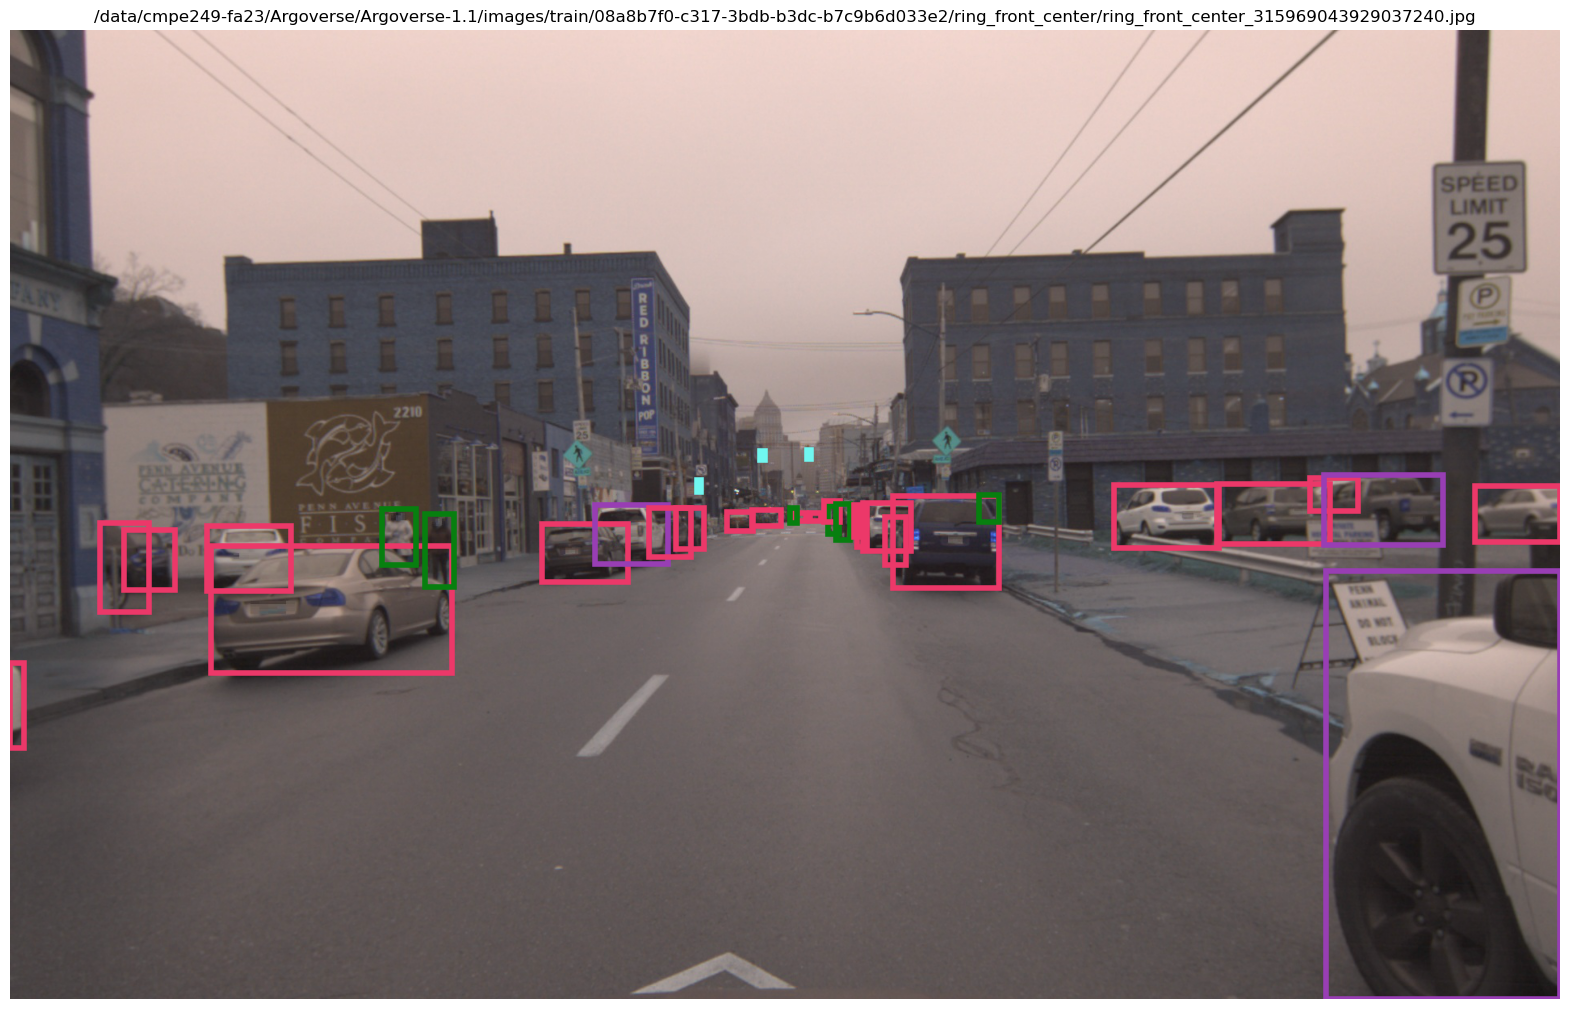

In [147]:
show_image_bbxyxy(im, boxes_xyxy, ids, ex)

## Convert Data to COCO Format
### References: 
https://www.kaggle.com/code/impiyush/simply-convert-data-to-coco-format
https://docs.ultralytics.com/datasets/detect/argoverse/#dataset-yaml   
https://medium.com/codable/convert-any-dataset-to-coco-object-detection-format-with-sahi-95349e1fe2b7

In [12]:
import numpy as np
import pandas as pd
import os
import json
import random
import cv2
import matplotlib.pyplot as plt
import ast
from tqdm import tqdm
from sahi.utils.coco import Coco, CocoCategory, CocoImage, CocoAnnotation
from sahi.utils.file import save_json
import shutil

In [13]:
# reference: https://medium.com/codable/convert-any-dataset-to-coco-object-detection-format-with-sahi-95349e1fe2b7
def yolo_to_coco(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    return [x1, y1, w, h] 

def convert_to_COCO(image_path, json_name):
    #1. Init COCO object
    coco = Coco()

    #2. Add categories (starting from id=0)
    for key, item in class_dic.items():
        coco.add_category(CocoCategory(id = key, name = item))

    #3. Get image and label paths
    image_path_list = list(Path(image_path).glob("*/*/*.jpg"))
    len_images = len(image_path_list)
    image_path_list = image_path_list[:len_images//2]
    label_path_list = []
    for p in image_path_list:
        temp_p = str(p).split('/')
        temp_p[5] = 'labels'
        rename = temp_p[-1].split('.')
        rename[-1] = 'txt'
        temp_p[-1] = '.'.join(rename)
        label_path_list.append(Path('/'.join(temp_p)))
    print(f'the number of images: {len(image_path_list)}')
    print(f'the number of labels: {len(label_path_list)}')

    #4. Create a COCO image
    no_annotation = 0
    for img_path, l_path in zip(image_path_list, label_path_list):
        f_name = str(img_path).split('/')
        ImageHeight = float(Image.open(img_path).height)
        Imagewidth = float(Image.open(img_path).width)
        
        if os.path.isfile(l_path):
            coco_image = CocoImage(file_name = '/'.join(f_name[-3:]), height = ImageHeight, width = Imagewidth)
            with open(str(l_path)) as f:
                lines = f.readlines()
                for line in lines:
                    line = line.strip()
                    temp_line_list = line.split(' ')

                    # bbox annotation is x_center, y_center, width, height 
                    obj_class, x_center, y_center, width_yolo, height_yolo = temp_line_list
                    bbox = yolo_to_coco(float(x_center), float(y_center), float(width_yolo), float(height_yolo), Imagewidth, ImageHeight)
                    cat_name = class_dic[int(obj_class)]
                    coco_image.add_annotation(CocoAnnotation(bbox = bbox, 
                                                             category_id = int(obj_class), 
                                                             category_name = cat_name))
            coco.add_image(coco_image)
        else:
            no_annotation += 1
            continue

    print(f"The number of images that don't have label: {no_annotation}")

    # 5. save as json file
    print('.......Creating COCO Json File.......')
    save_path = '/data/cmpe249-fa23/argo1COCO/' + json_name
    save_json(data=coco.json, save_path=save_path)
    print('DONE')
    
    

In [15]:
image_path = '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/val'
json_name_file = 'argo1_half_val.json'
convert_to_COCO(image_path, json_name_file)

the number of images: 7531
the number of labels: 7531
The number of images that don't have label: 0
.......Creating COCO Json File.......
DONE


## Test if annotation is correctly done

In [7]:
from DeepDataMiningLearning.detection.dataset_argo1coco import Argo1COCODataset
import DeepDataMiningLearning.detection.transforms as T
def get_transformsimple():
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ToDtype(torch.float, scale=True))
    # if train:
    #     transforms.append(RandomHorizontalFlip(0.5))
    return T.Compose(transforms)
    
data_root = '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/'
ann_file = '/data/cmpe249-fa23/argo1COCO/argo1_val_all.json'
myargo1coco = Argo1COCODataset(root=data_root,  
                          annotation=ann_file,
                               train = False,
                          transform=get_transformsimple())
length = len(myargo1coco)
print("Dataset",length)#85008

loading annotations into memory...
Done (t=4.05s)
creating index...
index created!
Dataset 15055


In [199]:
img, target, path = myargo1coco.__getitem__(400)
print(target.keys())

dict_keys(['boxes', 'labels', 'image_id', 'area', 'iscrowd'])


In [200]:
path

'val/33737504-3373-3373-3373-633738571776/ring_front_center/ring_front_center_315968430164570328.jpg'

In [201]:
image_path = '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/'
image_data_path_ex = image_path + path

imgdata = Image.open(image_data_path_ex)
img_array = np.array(imgdata)

im = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
bboxes = target['boxes'].detach().numpy()
ids = target['labels'].detach().numpy()

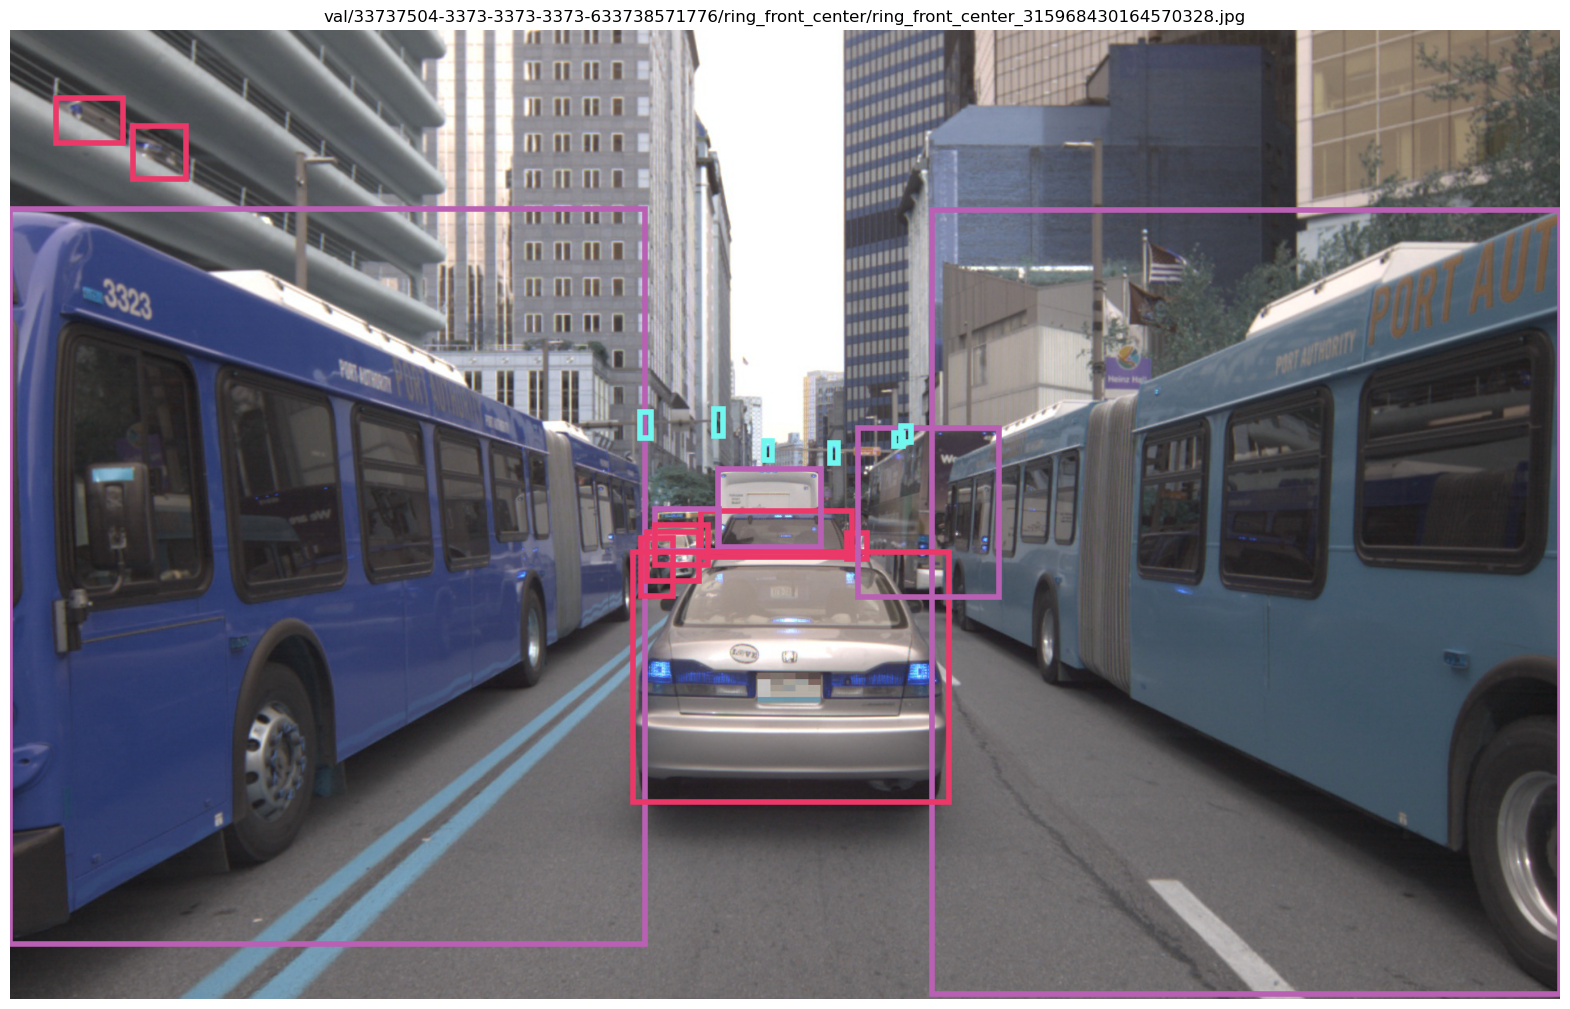

In [202]:
show_image_bbxyxy(im, bboxes, ids, path)